In [1]:
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [3]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.saving import load_model

2023-12-22 23:13:28.267907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 23:13:28.267938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 23:13:28.268561: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 23:13:28.273994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 23:13:28.800040: W tensorflow/compiler/tf2

In [4]:
data_dir = 'mosquitoes-dataset/'
test_dir = 'test-dataset/'
model_dir = 'models/'

In [5]:
class_names = sorted(os.listdir(data_dir))

In [6]:
class_num = len(class_names)

In [7]:
model = load_model(os.path.join(model_dir, "model.h5"))

2023-12-22 23:13:29.496640: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-22 23:13:29.496662: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: byte
2023-12-22 23:13:29.496666: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: byte
2023-12-22 23:13:29.496737: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 545.23.8
2023-12-22 23:13:29.496749: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 545.23.8
2023-12-22 23:13:29.496752: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 545.23.8


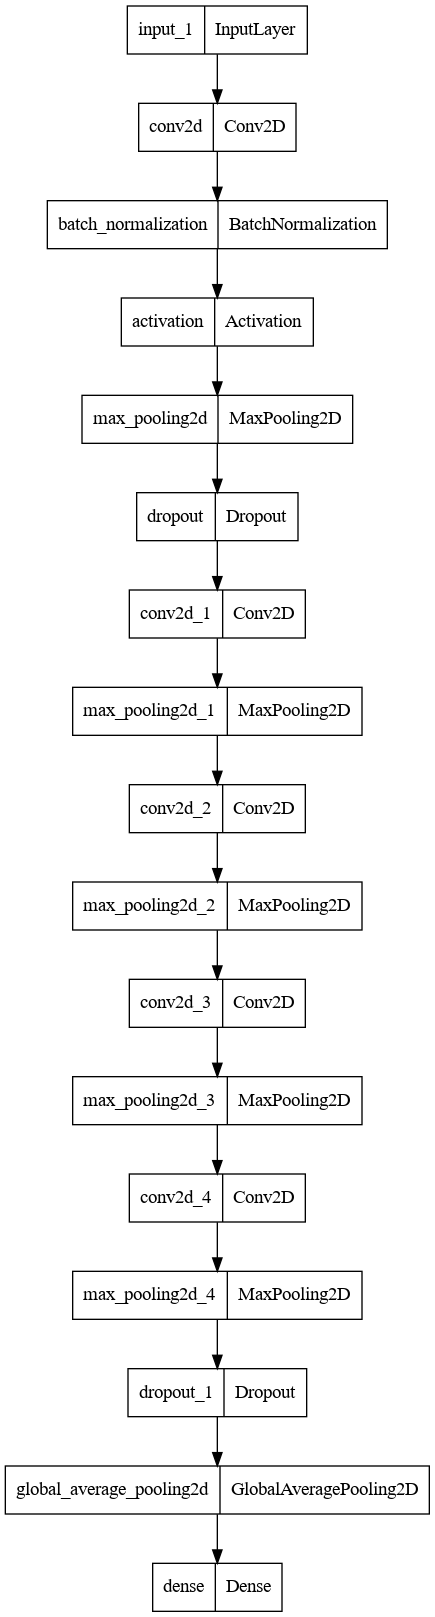

In [8]:
tf.keras.utils.plot_model(model)

In [9]:
IMG_DIM = 224
IMG_SIZE = (IMG_DIM, IMG_DIM)
IMG_SHAPE = IMG_SIZE + (3,)

1/1 [==============================] - 0s 78ms/step
[0.43704242 0.5629576 ]


(-0.5, 223.5, 223.5, -0.5)

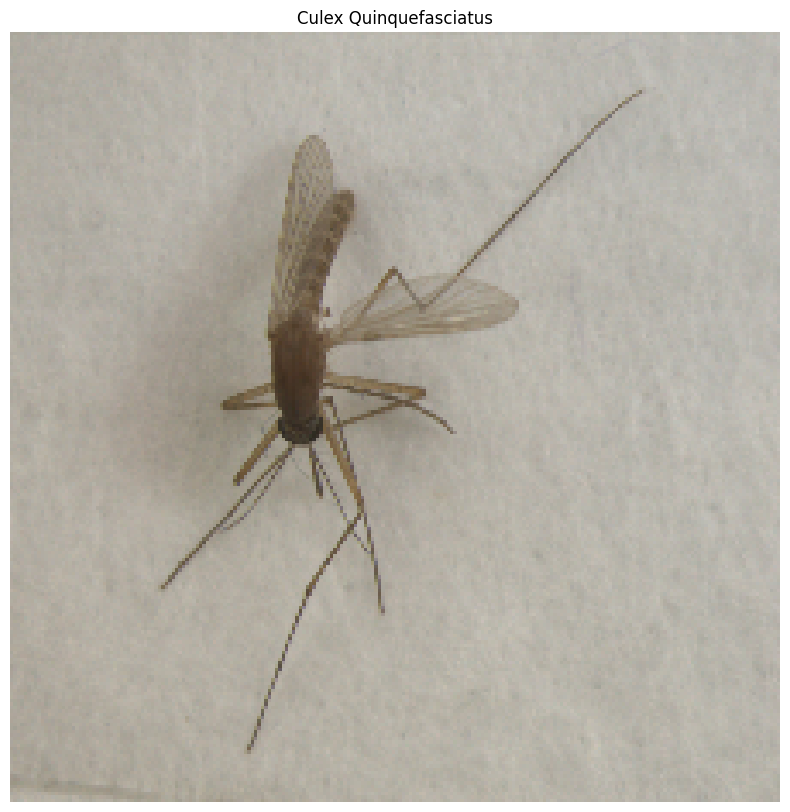

In [10]:
plt.figure(figsize=(10, 10))
img = cv2.imread(os.path.join(test_dir, 'Culex Quinquefasciatus', 'culex_quinquefasciatus_f_JHB_image0045.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_LINEAR)
x = np.expand_dims(img / 255, 0)

yhat = model.predict(x)
yhat = tf.nn.softmax(yhat[0])
yhat = np.array(yhat)

print(yhat)

plt.imshow(img.astype('uint8'))
plt.title(class_names[np.argmax(yhat)])
plt.axis("off")